In [1]:
import pandas as pd
import seaborn as sns

from math import floor
from copy import deepcopy

import random

In [2]:
# Настройка для более красивого отображения графиков с помощью seaborn.
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
def custom_compare(x, y):
    if str(x) != str(y):
        raise RuntimeError(f'Ожидаемое значение: {y}. Фактическое: {x}')

In [4]:
class ShuffleOnceRandom():
    """
    Генератор случайных чисел, который запрещает использовать
    функцию shuffle больше одного раза.
    """
    
    def __init__(self, seed=None):
        import random
        
        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0
        
    def shuffle(self, l):
        if self._shuffle_cnt > 0:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')
            
        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

In [5]:
class ShuffleNRandom():
    """
    Генератор случайных чисел, который запрещает использовать
    функцию shuffle больше n раз.
    """
    
    def __init__(self, n, seed=None):
        import random
        
        self._n = n
        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0
        
    def shuffle(self, l):
        if self._shuffle_cnt > self._n:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')
            
        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

# Лекция 3. Как разбить пользователей на группы

## Задание 1

In [9]:
def split_solution(data, 
                   frac,
                   random_gen):
    """
    Разбивает переданный список объектов на две выборки.
    
    Аргументы:
        data: Список объектов, который нужно разделить на выборки.
        frac: Доля объектов, которые нужно отправить в первую выборку.
        random_gen: Генератор случайных чисел.
        
    Возвращаемое значение:
        Пара списков: первая выборка, вторая выборка.
    """
    _data = deepcopy(data)
    random_gen.shuffle(_data)
    num = floor(len(_data) * frac)
    return _data[:num], _data[num:]

In [10]:
def split_tests():
    example_1_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    example_1_frac = 0.7
    example_1_random_gen = ShuffleOnceRandom(0)
    
    example_1_res = [8, 9, 2, 6, 4, 5, 3], [1, 10, 7]
    
    custom_compare(split_solution(example_1_data, 
                                  example_1_frac, 
                                  example_1_random_gen),
                   example_1_res)
    
    
    example_2_data = [i % 5 for i in range(100)]
    example_2_frac = 0.9
    example_2_random_gen = ShuffleOnceRandom(0)
    
    example_2_res = [3, 3, 1, 2, 3, 3, 1, 1, 4, 4, 1, 3, 2, 1, 0, 2, 2, 2, 3, 1, 4, 1, 4, 0, 4, 0, 2, 4, 3, 2, 3, 1, 3, 4, 1, 3, 4, 3, 4, 4, 4, 0, 4, 0, 0, 1, 1, 1, 2, 2, 3, 0, 4, 0, 3, 1, 1, 0, 2, 0, 3, 2, 3, 0, 1, 0, 1, 0, 0, 4, 0, 1, 0, 2, 4, 2, 4, 3, 2, 3, 2, 4, 2, 0, 1, 2, 4, 2, 4, 0], [1, 3, 1, 2, 0, 3, 0, 3, 2, 4]
    
    custom_compare(split_solution(example_2_data, 
                                  example_2_frac, 
                                  example_2_random_gen),
                   example_2_res)
    
    print('Все тесты прошли успешно!')

In [11]:
split_tests()

Все тесты прошли успешно!


# Лекция 4. Элементы математической статистики

In [13]:
general_vals = pd.read_csv('general_vals.csv')
general_vals

,metric
0,-3.82
1,-4.11
2,2.09
3,4.25
4,-2.90
...,...
995,-3.72
996,3.82
997,-1.85
998,-4.75


## Задание 1

Постройте график распределения значений из колонки `metric` и вычислите среднее значение в колонке.

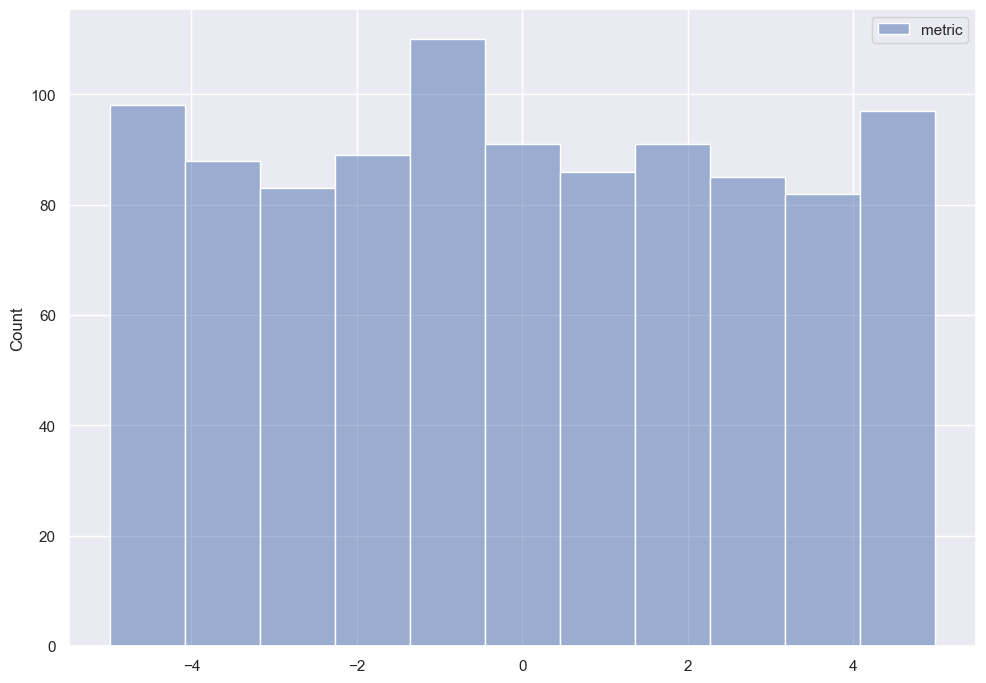

In [15]:
plot = sns.histplot(general_vals)
plot.get_figure().savefig('plot.png', dpi=400)

In [16]:
general_vals.mean()

metric   -0.01712
dtype: float64

## Задание 2

Будем рассматривать значения из колонки `metric` как некоторую генеральную совокупность.

Используя реализованную в рамках предыдущих заданий модуля функцию `split_solution`, создайте случайную выборку, размер которой равен `0.03` от размера всей генеральной совокупности. Для этого воспользуйтесь данным в блокноте генератором случайных чисел — `task_2_random_gen`. В качестве искомой выборки возьмите первую выборку из результата работы функции `split_solution`.

Вычислите разность выборочного среднего и среднего в генеральной совокупности. В качестве ответа укажите модуль этой разности, округлённый до $2$ знаков после запятой. В процессе вычисления средние не округляйте.

**Рекомендации по решению**

Важно, что значения из генеральной совокупности удобно поместить из колонки в список. Сделать это можно с помощью функции `list`:
```
metric_l = list(general_vals.metric)
```

In [30]:
task_2_random_gen = ShuffleOnceRandom(0)
pd.Series(split_solution(general_vals['metric'], 0.03, task_2_random_gen)[0]).mean()

0.08033333333333341

In [31]:
0.08033333333333341 - (-0.01712)

0.0974533333333334

## Задание 3

Сгенерируйте $1000$ случайных выборок из генеральной совокупности размера $0.03$ от её размера, воспользовавшись заготовкой ниже.

Постройте график распределения выборочных средних и вычислите разность среднего в полученном распределении выборочных средних и среднего в генеральной совокупности.

In [42]:
N = 1000
frac = 0.03

In [43]:
task_3_random_gen = ShuffleNRandom(N, seed=1)

In [44]:
random_samples_mean = []
metric_l = list(general_vals.metric)

for i in range(N):
    random_sample, _ = split_solution(metric_l, frac, task_3_random_gen)
    random_samples_mean.append(pd.Series(random_sample).mean())
    
random_samples_mean

[0.5573333333333331,
 -0.8136666666666665,
 0.33366666666666667,
 -0.8366666666666667,
 -0.21499999999999997,
 -0.16466666666666666,
 -0.21233333333333335,
 0.43199999999999983,
 0.5966666666666666,
 -0.5893333333333334,
 -0.017333333333333333,
 -0.9246666666666665,
 0.08166666666666662,
 -0.9229999999999998,
 0.5519999999999999,
 -0.34666666666666673,
 -0.37100000000000005,
 0.5533333333333332,
 -0.6056666666666666,
 -0.4483333333333333,
 0.45666666666666644,
 0.23866666666666667,
 -0.4703333333333333,
 -0.8183333333333332,
 1.2393333333333334,
 -1.2426666666666664,
 -0.14033333333333337,
 -0.37600000000000006,
 1.0213333333333334,
 -0.39999999999999997,
 -0.5583333333333332,
 -0.03500000000000004,
 0.010333333333333394,
 0.46333333333333343,
 -0.07833333333333341,
 -0.5256666666666666,
 0.16933333333333359,
 0.17066666666666655,
 -0.22266666666666665,
 -0.6780000000000002,
 -0.575,
 0.4533333333333333,
 0.16799999999999998,
 0.45766666666666656,
 -0.060666666666666716,
 -1.06,
 0.312

<Axes: ylabel='Count'>

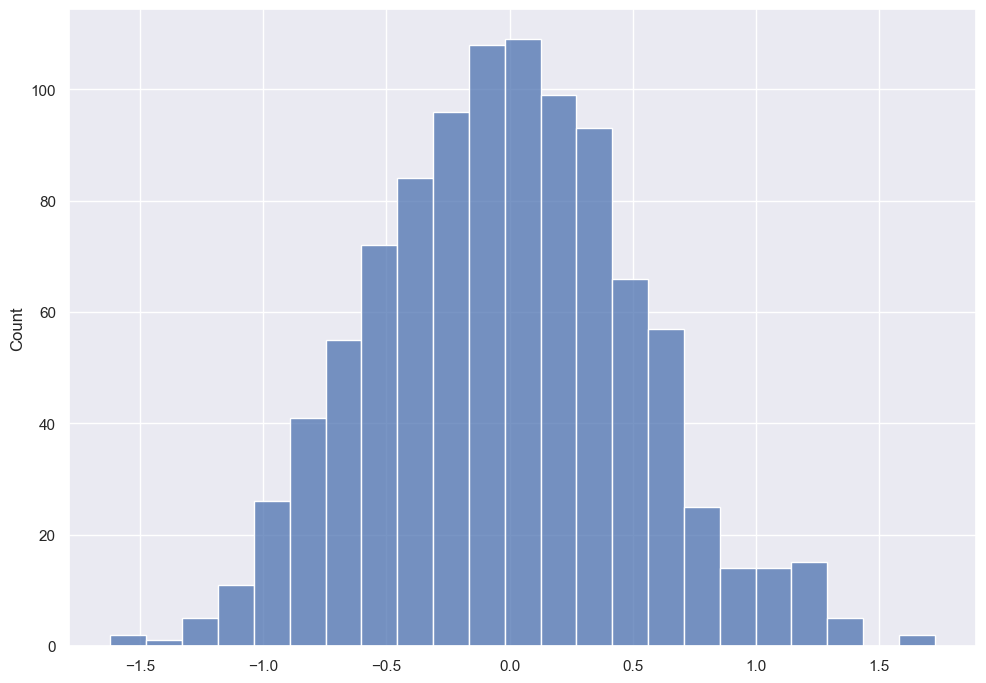

In [45]:
sns.histplot(random_samples_mean)

In [46]:
pd.Series(random_samples_mean).mean()

-0.021556333333333334

In [49]:
round(abs(-0.021556333333333334 - (-0.01712)), 3)

0.004

# Лекция 7. Статистическая проверка гипотез на практике

In [ ]:
!pip3 install scipy

In [51]:
ab_data = pd.read_csv('ab_data.csv')
ab_data

,metric,group
0,5.59,control
1,3.72,treatment
2,5.88,control
3,3.96,treatment
4,6.21,treatment
...,...,...
1995,3.68,control
1996,4.92,control
1997,6.98,treatment
1998,4.15,control


## Задание 1

Как вы узнали из лекции, одним из условий использования t-теста является то, что дисперсии в сравниваемых группах должны быть равны. Проверить равенство дисперсий в генеральных совокупностях, соответствующих конкретным выборкам, можно с помощью отдельного статистического теста — теста Левена, который проверяет нулевую гипотезу о равенстве дисперсий в двух распределениях.

Проверьте гипотезу о равенстве дисперсий в контрольной и экспериментальной группах. Для этого импортируйте из библиотеки `scipy` тест Левена:
```
from scipy.stats import levene
```

После этого запустите функцию `levene`, передав в качестве первого её аргумента список значений метрики из выборки, соответствующей контрольной группе, а в качестве второго аргумента — список значений метрики из выборки, соответствующей экспериментальной группе.

В результате работы функция вернёт пару чисел: значение статистики теста, рассчитанной для наших данных, а также значение p-value для наших данных.

In [52]:
from scipy.stats import levene

In [54]:
control = ab_data.loc[ab_data['group'] == 'control', 'metric']
treatment = ab_data.loc[ab_data['group'] == 'treatment', 'metric']
levene(control, treatment)

LeveneResult(statistic=107.67350477530621, pvalue=1.319884460803661e-24)

## Задание 2

Теперь можно переходить к сравнению средних значений метрики в двух группах с помощью t-теста.

Чтобы импортировать его из библиотеки `scipy`, воспользуйтесь следующим кодом:
```
from scipy.stats import ttest_ind
```

Аналогично функции `levene` функция `ttest_ind` принимает на вход списки значений метрики для двух выборок, а возвращает пару значений — статистику теста и значение p-value.

У функции `ttest_ind` есть дополнительный аргумент `equal_var`, который по умолчанию равен `True`. Этот аргумент отвечает за то, будет ли использоваться при сравнении двух выборок t-тест Уэлча, учитывающий возможную разницу между дисперсиями распределений. В случае, если значение `equal_var = True`, используется обычный вариант t-теста, в случае, если значение равно `False`, используется t-тест Уэлча.

В рамках задания установите параметр `equal_var = False` в случае, если тест Левена в предыдущем задании позволил вам отклонить нулевую гипотезу о равенстве дисперсий на заданном уровне значимости $\alpha = 0.01$.

In [55]:
from scipy.stats import ttest_ind

In [56]:
ttest_ind(control, treatment, equal_var=False)

TtestResult(statistic=-21.309858122923494, pvalue=4.593232942709043e-90, df=1805.2246374875774)

In [2]:
11400000 / 89 * 100

12808988.764044944